# **CASE: INTERAÇÃO ENTRE COLABORADORES**

---

### Instalação de bibliotecas

In [ ]:
# Para análises de dados em formato de rede/grafo
install.packages("igraph")

### Carregamento de bibliotecas

In [1]:
library(igraph)
library(RColorBrewer) # já pré-instalado, se for em Google Colab


Attaching package: ‘igraph’


The following objects are masked from ‘package:stats’:

    decompose, spectrum


The following object is masked from ‘package:base’:

    union




### Leitura da base de dados

In [2]:
dados_colaboradores <- read.table(file   = "../Dados/Interacao_Colaboradores.txt",
                                  sep    = "\t",
                                  header = TRUE)

### Visualização da base de dados

In [ ]:
View(dados_colaboradores)

### Criação da rede e objetos auxiliares

In [3]:
# Criação de grafo
rede <- graph_from_data_frame(dados_colaboradores, directed = FALSE)

In [4]:
# Arestas
arestas <- E(rede)
arestas

+ 399/399 edges from bc35479 (vertex names):
 [1] DS01--DS04 DS01--DS06 DS01--BA03 DS01--DS10 DS01--DS11 DS01--DS13
 [7] DS01--DA05 DS01--DS15 DS01--DA04 DS01--DA08 DS01--DE01 DS01--DE02
[13] DS01--DE04 DS01--DE06 DS01--DE08 DS01--BA05 DS01--BA06 DS01--BA10
[19] DS01--ML05 DS02--DS04 DS02--DA02 DS02--DS06 DS02--DS09 DS02--DS10
[25] DS02--DS11 DS02--BA07 DS02--DS13 DS02--DA05 DS02--DS15 DS02--DS14
[31] DS02--BA09 DS02--DA09 DS02--DE03 DS02--DE04 DS02--DE10 DS02--DA07
[37] DS02--ML01 DS02--ML03 DS03--DS04 DS03--DA02 DS03--DS06 DS03--BA03
[43] DS03--DS08 DS03--DS09 DS03--DS10 DS03--DS11 DS03--BA07 DS03--DS13
[49] DS03--DS15 DS03--DA01 DS03--DA04 DS03--DA09 DS03--DE04 DS03--DE07
[55] DS03--DE09 DS03--DE10 DS03--BA02 DS03--BA06 DS03--BA08 DS03--ML01
+ ... omitted several edges

In [5]:
# Matriz de adjacências
matriz_adj <- as_adjacency_matrix(rede)
matriz_adj

  [[ suppressing 50 column names ‘DS01’, ‘DS02’, ‘DS03’ ... ]]



50 x 50 sparse Matrix of class "dgCMatrix"
                                                                              
DS01 . . . 1 . 1 1 . . 1 1 . 1 1 1 . . . 1 . . . 1 . . 1 1 . 1 . 1 . 1 . . . .
DS02 . . . 1 1 1 . . 1 1 1 1 1 1 1 . . . . 1 . 1 . 1 . . . 1 1 . . . . . 1 . .
DS03 . . . 1 1 1 1 1 1 1 1 1 1 . 1 1 . . 1 . . . . 1 . . . . 1 . . 1 . 1 1 . 1
DS04 1 1 1 . 1 1 . 1 1 1 1 1 1 . 1 . . 1 . . 1 . . . 1 . 1 . . . . . . . . . .
DA02 . 1 1 1 . 1 1 1 1 . 1 1 1 1 1 . . 1 . . . . . 1 1 . . . . 1 . 1 . 1 . . .
DS06 1 1 1 1 1 . . 1 1 1 1 1 1 . 1 1 1 . . . . 1 1 . . 1 . . . . 1 1 . 1 1 . .
BA03 1 . 1 . 1 . . 1 1 1 1 . . 1 1 1 . . . . . 1 . . . 1 . . . 1 . . . . . . .
DS08 . . 1 1 1 1 1 . 1 . 1 1 1 1 1 . . 1 . 1 . . . 1 . . . . . . . . . 1 1 . .
DS09 . 1 1 1 1 1 1 1 . 1 . 1 1 . 1 . . 1 1 1 . 1 . . . . . . . 1 . . . . 1 . .
DS10 1 1 1 1 . 1 1 . 1 . 1 1 1 1 1 1 1 . . . 1 . 1 . . . . 1 . 1 . . . 1 . . .
DS11 1 1 1 1 1 1 1 1 . 1 . . 1 1 1 1 1 1 . . . . 1 . . . . . . . . . . . 1 . .
BA07 . 1 

### Análise visual da rede

In [6]:
# Definição de semente aleatória, para reprodutibilidade de visualização
# Obs.: O layout "layout_with_fr" utilizado no bloco a seguir envolve um componente aleatório.
set.seed(123)

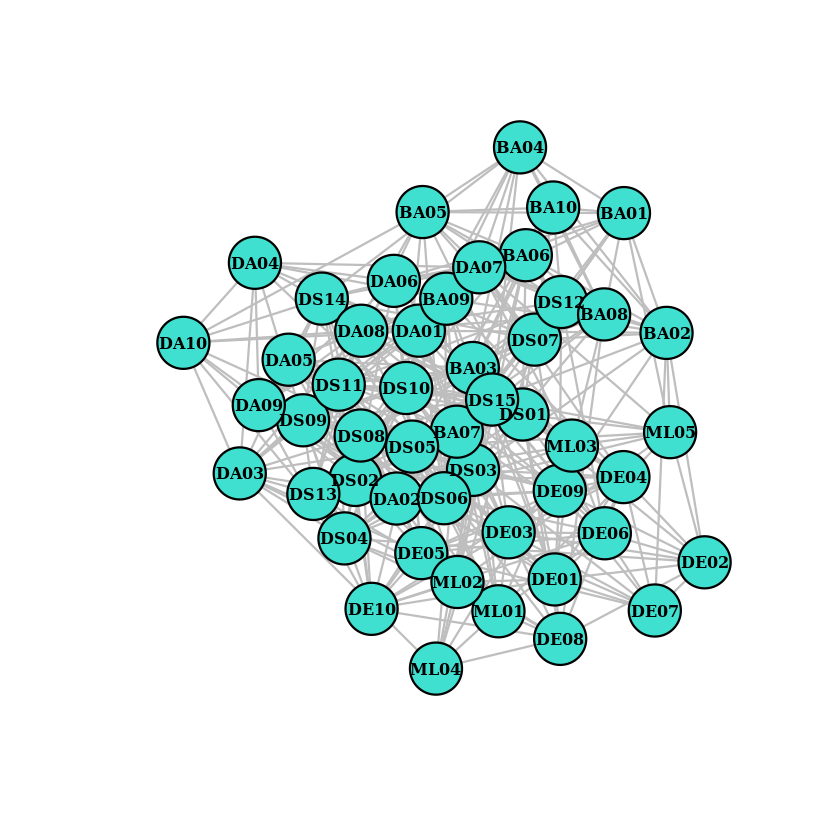

In [7]:
# Visualização da rede
plot.igraph(rede,
            layout             = layout_with_fr, # layout de disposição dos nós
            vertex.color       = "turquoise",    # cor de preenchimento dos nós
            vertex.size        = 20,             # tamanho dos nós
            vertex.shape       = "circle",       # formato dos nós
            vertex.label.color = "black",        # cor da fonte dos nós
            vertex.label.cex   = 0.8,            # tamanho da fonte dos nós
            vertex.label.font  = 2,              # tipo de fonte dos nós
            vertex.frame.width = 1.8,            # largura da borda dos nós
            edge.color         = "gray",         # cor das arestas
            edge.width         = 1.8,            # largura das arestas
            edge.label.cex     = 1,              # tamanho da fonte das arestas
            edge.label.color   = "black",        # cor da fonte das arestas
            edge.label.font    = 1)              # tipo de fonte das arestas

In [8]:
# Para consultar mais opções de parâmetros gráficos do pacote igraph, acesse:
# https://igraph.org/r/doc/plot.common.html

### Análise de coesão

In [9]:
# Distância geodésica média: média das menores distâncias entre todos os pares de nós
mean_distance(rede)

[1] 1.679184

In [10]:
# Diâmetro da rede: maior distância geodésica entre todos os pares de nós
diameter(rede)

[1] 3

In [11]:
# Densidade: proporção de arestas presentes, em relação ao total possível de arestas
edge_density(rede)

[1] 0.3257143

In [12]:
# Transitividade: proporção de triângulos presentes, em relação ao total possível de triângulos
transitivity(rede, type = "global")

[1] 0.3878291

### Identificação de melhores caminhos

In [13]:
# Matriz de distâncias geodésicas entre todos os pares de nós
distances(rede)

,DS01,DS02,DS03,DS04,DA02,DS06,BA03,DS08,DS09,DS10,⋯,BA06,DS12,BA08,DA07,ML01,ML02,ML03,BA10,ML05,ML04
DS01,0,2,2,1,2,1,1,2,2,1,⋯,1,2,2,2,2,2,2,1,1,2
DS02,2,0,2,1,1,1,2,2,1,1,⋯,2,2,2,1,1,2,1,2,2,2
DS03,2,2,0,1,1,1,1,1,1,1,⋯,1,2,1,2,1,1,2,2,2,1
DS04,1,1,1,0,1,1,2,1,1,1,⋯,2,2,2,2,1,1,2,2,2,2
DA02,2,1,1,1,0,1,1,1,1,2,⋯,2,1,2,2,2,1,1,2,1,2
DS06,1,1,1,1,1,0,2,1,1,1,⋯,2,2,2,2,1,2,2,2,2,2
BA03,1,2,1,2,1,2,0,1,1,1,⋯,1,1,2,2,1,1,1,1,2,2
DS08,2,2,1,1,1,1,1,0,1,2,⋯,2,1,2,1,1,2,2,2,2,2
DS09,2,1,1,1,1,1,1,1,0,1,⋯,2,2,2,2,2,2,2,2,2,2
DS10,1,1,1,1,2,1,1,2,1,0,⋯,2,2,1,2,2,2,2,2,2,2


In [14]:
# ATENÇÃO! Especifique um nó de origem e um nó de destino para realizar as análises dos blocos a seguir
ORIGEM  = "ML04"   # exemplo: "ML04"
DESTINO = "BA04"   # exemplo: "BA04"

In [15]:
# Menor caminho entre os nós especificados (em comprimento)
menor_caminho <- shortest_paths(rede,
                                from = ORIGEM,
                                to = DESTINO)$vpath[[1]]
menor_caminho

+ 4/50 vertices, named, from bc35479:
[1] ML04 DS03 BA03 BA04

In [16]:
# Comprimento associado ao menor caminho (em comprimento)
sum(lengths(menor_caminho))-1

[1] 3

In [17]:
# Lista de todos os caminhos que ligam dois nós (execução não recomendável para redes grandes)
# all_simple_paths(rede, from = ORIGEM, to = DESTINO)

In [18]:
# Lista de todos os caminhos que ligam dois nós, com determinado comprimento máximo (por exemplo, 3)
all_simple_paths(rede, from = ORIGEM, to = DESTINO, cutoff = 3)

[[1]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DS03 BA03 BA04

[[2]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DS03 DS15 BA04

[[3]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DS03 DA01 BA04

[[4]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DS03 BA02 BA04

[[5]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DS03 BA08 BA04

[[6]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 BA07 DS15 BA04

[[7]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 BA07 DA01 BA04

[[8]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 BA07 DS14 BA04

[[9]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 BA07 BA09 BA04

[[10]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 BA07 BA01 BA04

[[11]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 BA07 BA08 BA04

[[12]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DA03 DA01 BA04

[[13]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DA03 DS14 BA04

[[14]]
+ 4/50 vertices, named, from bc35479:
[1] ML04 DA03 BA09 BA04

[[15]]
+ 4/50 vertices, named

### Medidas de centralidade

In [19]:
# Centralidade de grau
as.data.frame(degree(rede))

,degree(rede)
,<dbl>
DS01,19
DS02,19
DS03,24
DS04,18
DA02,22
DS06,23
BA03,20
DS08,20
DS09,19


In [20]:
# Centralidade de proximidade
as.data.frame(round(closeness(rede),3))

,"round(closeness(rede), 3)"
,<dbl>
DS01,0.013
DS02,0.013
DS03,0.014
DS04,0.013
DA02,0.013
DS06,0.013
BA03,0.013
DS08,0.013
DS09,0.013


In [21]:
# Centralidade de intermediação
as.data.frame(round(betweenness(rede),1))

,"round(betweenness(rede), 1)"
,<dbl>
DS01,32.3
DS02,16.5
DS03,42.6
DS04,17.8
DA02,30.7
DS06,26.6
BA03,28.0
DS08,18.1
DS09,16.3


### Detecção de comunidades

#### Algoritmo de Louvain

In [22]:
# Definição de semente aleatória, para reprodutibilidade dos resultados
set.seed(123)

In [38]:
# Execução do algoritmo
comunidades_louvain <- cluster_louvain(rede,
                                       resolution = 2)  # ajuda a controlar o tamanho dos clusters

In [39]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_louvain)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_louvain)]

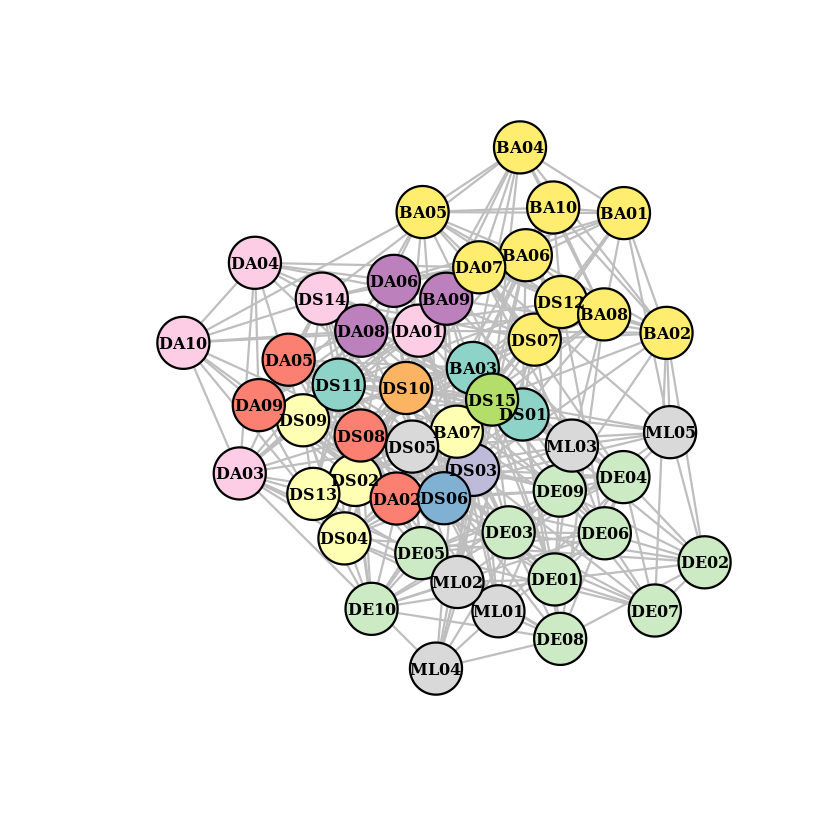

In [40]:
# Visualização dos clusters
set.seed(123)
plot(rede,
     layout             = layout_with_fr,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Infomap

In [26]:
# Execução do algoritmo
comunidades_infomap <- cluster_infomap(rede)

In [27]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_infomap)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_infomap)]

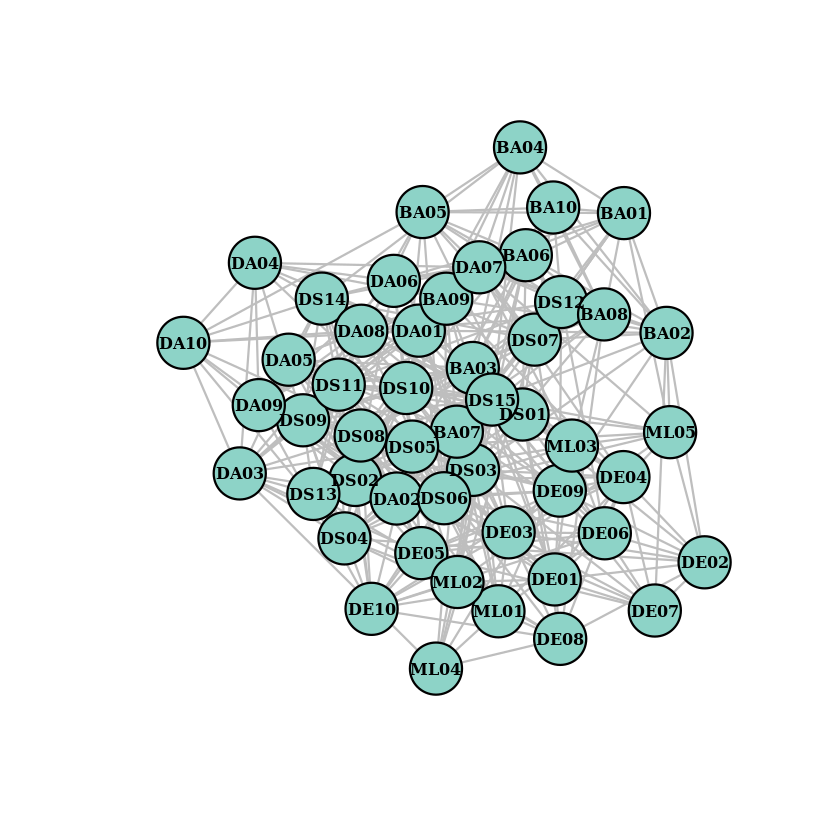

In [28]:
# Visualização dos clusters
set.seed(123)
plot(rede,
     layout             = layout_with_fr,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Walktrap

In [29]:
# Execução do algoritmo
comunidades_walktrap <- cluster_walktrap(rede)

In [30]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_walktrap)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_walktrap)]

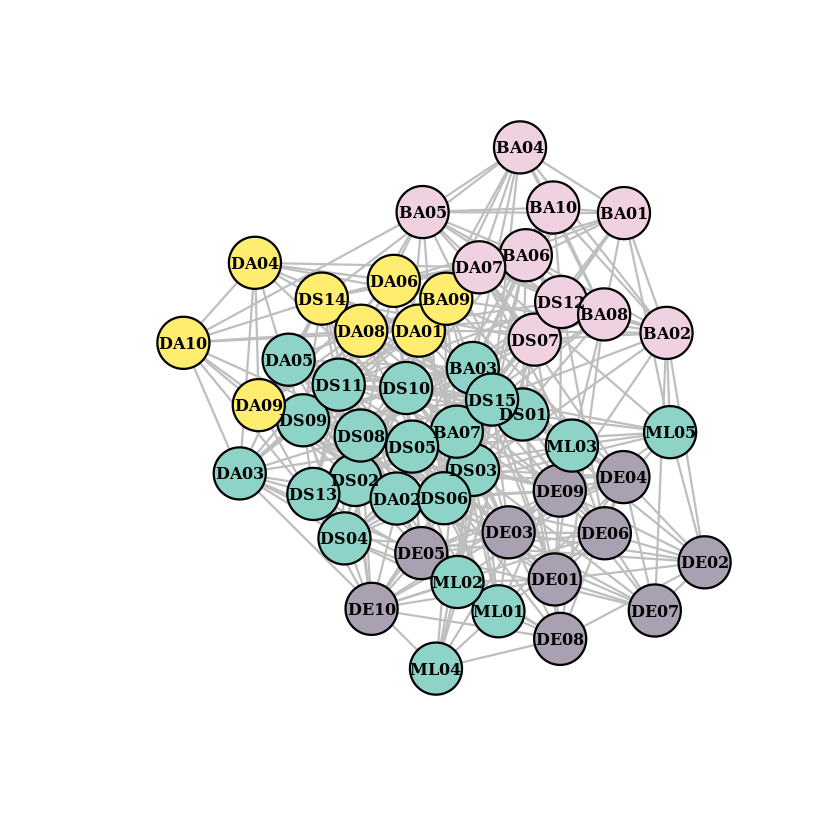

In [31]:
# Visualização dos clusters
set.seed(123)
plot(rede,
     layout             = layout_with_fr,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Edge Betweenness

In [32]:
# Execução do algoritmo
comunidades_edge_betweenness <- cluster_edge_betweenness(rede)

In [33]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_edge_betweenness)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_edge_betweenness)]

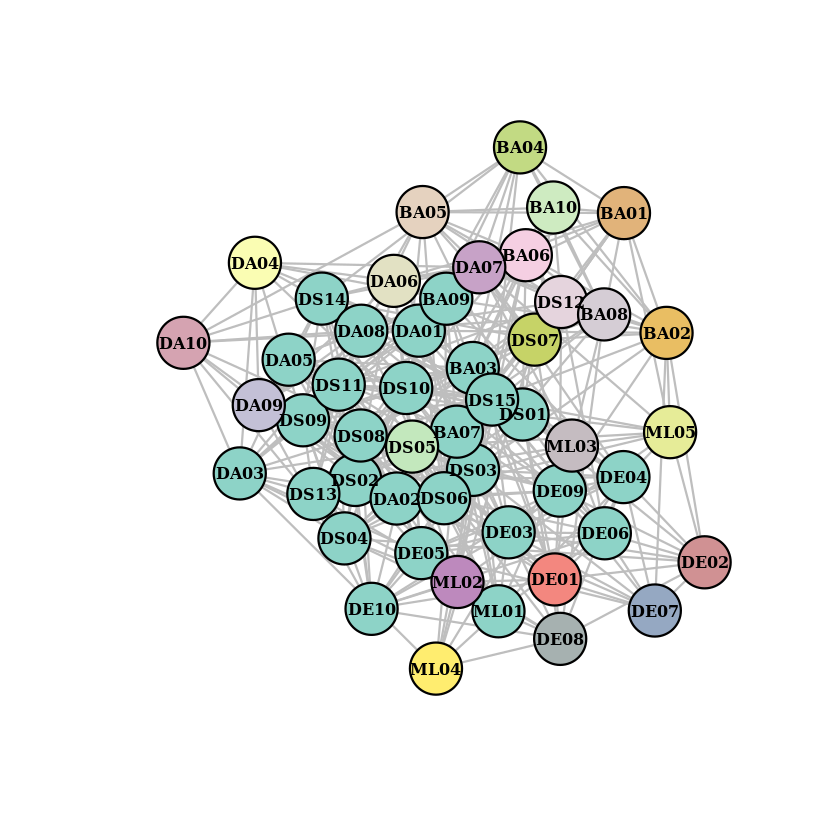

In [34]:
# Visualização dos clusters
set.seed(123)
plot(rede,
     layout             = layout_with_fr,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas

#### Algoritmo Label Propagation

In [35]:
# Execução do algoritmo
comunidades_label_prop <- cluster_label_prop(rede)

In [36]:
# Comandos auxiliares para definir cores dos clusters, usando paleta personalizada
qtde_clusters <- length(comunidades_label_prop)
cores <- colorRampPalette(brewer.pal(12, "Set3"))(qtde_clusters)
V(rede)$color <- cores[membership(comunidades_label_prop)]

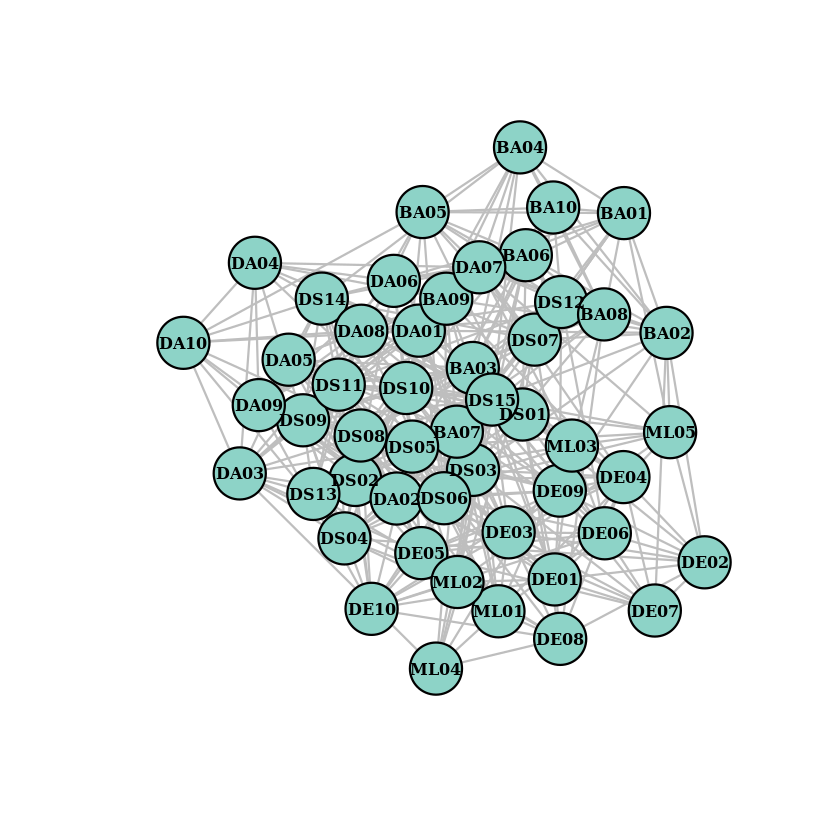

In [37]:
# Visualização dos clusters
set.seed(123)
plot(rede,
     layout             = layout_with_fr,       # layout de disposição dos nós
     vertex.color       = V(rede)$color,        # cor de preenchimento dos nós
     vertex.size        = 20,                   # tamanho dos nós
     vertex.shape       = "circle",             # formato dos nós
     vertex.label.color = "black",              # cor da fonte dos nós
     vertex.label.cex   = 0.8,                  # tamanho da fonte dos nós
     vertex.label.font  = 2,                    # tipo de fonte dos nós
     vertex.frame.width = 1.8,                  # largura da borda dos nós
     edge.color         = "gray",               # cor das arestas
     edge.width         = 1.8,                  # largura das arestas
     edge.label.cex     = 1,                    # tamanho da fonte das arestas
     edge.label.color   = "black",              # cor da fonte das arestas
     edge.label.font    = 1)                    # tipo de fonte das arestas